Predicting the price:
Use the given dataset to analyse the relationship between advertising modes and sales using a simple linear regression model.
The dataset can be found on this link: https://www.kaggle.com/ashydv/advertising-dataset/version/1

In [2]:
import pandas as pd
import numpy as np

#load the train and validation dataset
df = pd.read_csv('https://www.kaggle.com/datasets/ashydv/advertising-dataset')

ParserError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [ ]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


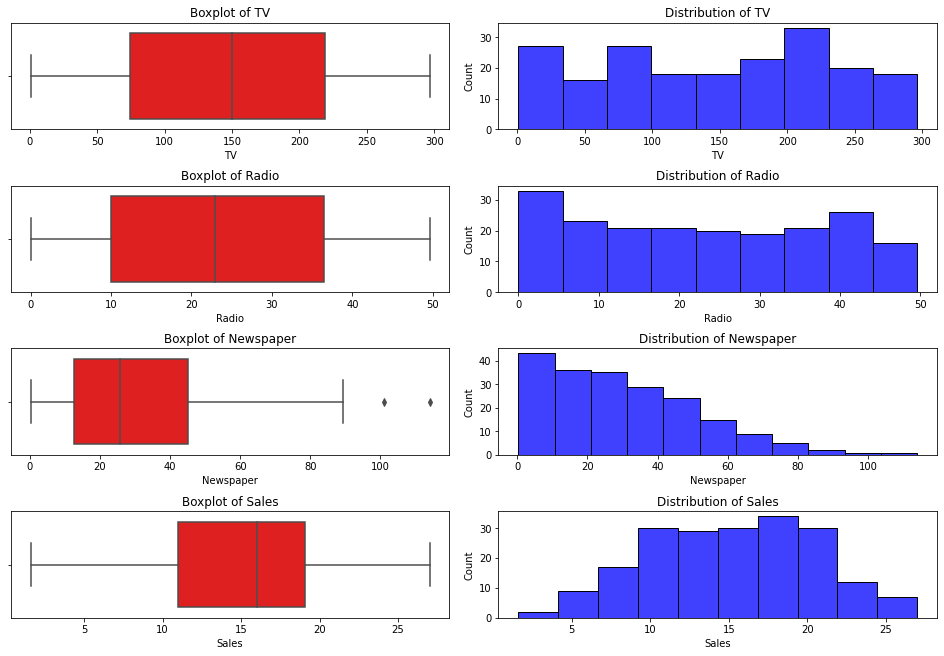

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(len(df.columns), 2, constrained_layout = True, figsize=([13,9]))

for i in range(len(df.columns)):
    
    sns.boxplot(x=df[df.columns[i]], ax=axes[i,0], color="r")
    axes[i,0].set_title('Boxplot of '+df.columns[i])
    sns.histplot(x=df[df.columns[i]], ax=axes[i,1], color="b")
    axes[i,1].set_title('Distribution of '+df.columns[i])



<AxesSubplot:>

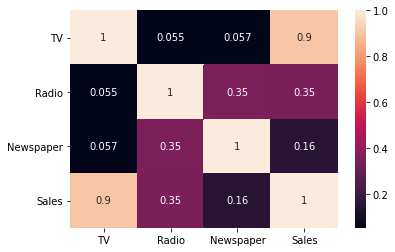

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Let's split our data
X = df.drop(['Sales'], axis=1) #Input features
y= df[["Sales"]] #Output

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [ ]:
X_test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train_scaled,y_train)

In [ ]:
linear_model.intercept_

array([15.57066667])

In [ ]:
linear_model.coef_

array([[4.63204383, 1.48207916, 0.0889496 ]])

The predicted function:
Sales = 15.57 + TV 4.63 + radio 1.48 + newspaper * 0.088

In [ ]:
y_pred = linear_model.predict(X_test_scaled)

In [ ]:
result = pd.DataFrame()
result["Predictions_LR"] = np.reshape(y_pred,50)
result["Actual"] = y_test.values

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(result["Actual"],result["Predictions_LR"])

1.1199940713361782

In [ ]:
result["Error_LR"] = np.abs(result["Actual"].values - result["Predictions_LR"].values)

In [ ]:
SAE = result["Error_LR"].sum() #Sum of Absolute Errors

55.99970356680891

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9115647723992757

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train_scaled, np.reshape(y_train.values,y_train.shape[0]))

SGDRegressor()

In [ ]:
sgd.coef_

array([4.63077628, 1.48191088, 0.09885106])

In [ ]:
sgd.intercept_

array([15.55138413])

In [ ]:
sgd.n_iter_

25

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
ypred = neigh.predict(X_test_scaled)

In [ ]:
result["Predictions_2-NN"] = np.reshape(ypred,ypred.shape[0])

In [ ]:
result["Error_2-NN"] = np.abs(result["Actual"].values - result["Predictions_LR"].values)

In [ ]:
#Tuning the value of K in KNN
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsRegressor()
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_absolute_error', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 2}


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)

knn = KNeighborsRegressor()

scores = cross_val_score(knn, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('Negative_MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Negative_MAE: -1.421 (0.249)


In [ ]:
scores

array([-1.14466667, -1.28      , -1.30733333, -1.51533333, -1.85866667])